#  ***🚜👨‍🌾🌾Crop Recommendation: Analysis & Classification 🚜👨‍🌾🌾***




In this crop recommendation, Once the farmer provide the parameters like N-P-K, temperature, humidity, pH value, rainfall, crop from their side and the application will predict which crop should the farmer grow.

# **📖 Introduction**

Precision agriculture is popular at the moment. Precision agriculture is an intensive farming technique that uses data from soil characteristics, soil types, crop yield data, and weather conditions to recommend the best crop to farmers for maximum yield and profit. This technique can help farmers gather more information about their farming strategy by reducing  crop failures.

To help relieve the agriculture crisis in the current state of affairs, better recommendation systems are required to assist farmers in drawing conclusions before beginning crop cultivation.

***🎯 Goals***

To recommend beneficial crops for farmers to cultivate based on various parameters and to assist them in making a decision prior to cultivation.

<font color='Green' size='5'><b>1. Importing Libraries</b></font>


In [87]:
# Data Processing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio



# Feature Selection Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


# Machine Learning Algorithms
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Machine Learning Model Evaluation Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import plotly.io as pio


# Few Miscellaneous Libraries
import ipywidgets
from ipywidgets import interact
import pickle
import warnings
warnings.filterwarnings('ignore')

<font color='Green' size='5'><b>2. Loading data</b></font>

In [88]:
df = pd.read_csv("Crop_Recommendation (1).csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [89]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


**N** - ratio of Nitrogen content in soil

**P** - ratio of Phosphorous content in soil

**K** - ratio of Potassium content in soil

**temperature** - temperature in degree Celsius

**humidity** - relative humidity in %

**ph** - ph value of the soil

**rainfall** - rainfall in mm

<font color='Green' size='5'><b>3. Exploratory Data Analysis</b></font>

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [91]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [92]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [93]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [94]:
df.isnull().any()

,0
N,False
P,False
K,False
temperature,False
humidity,False
ph,False
rainfall,False
label,False


There are no missing values.

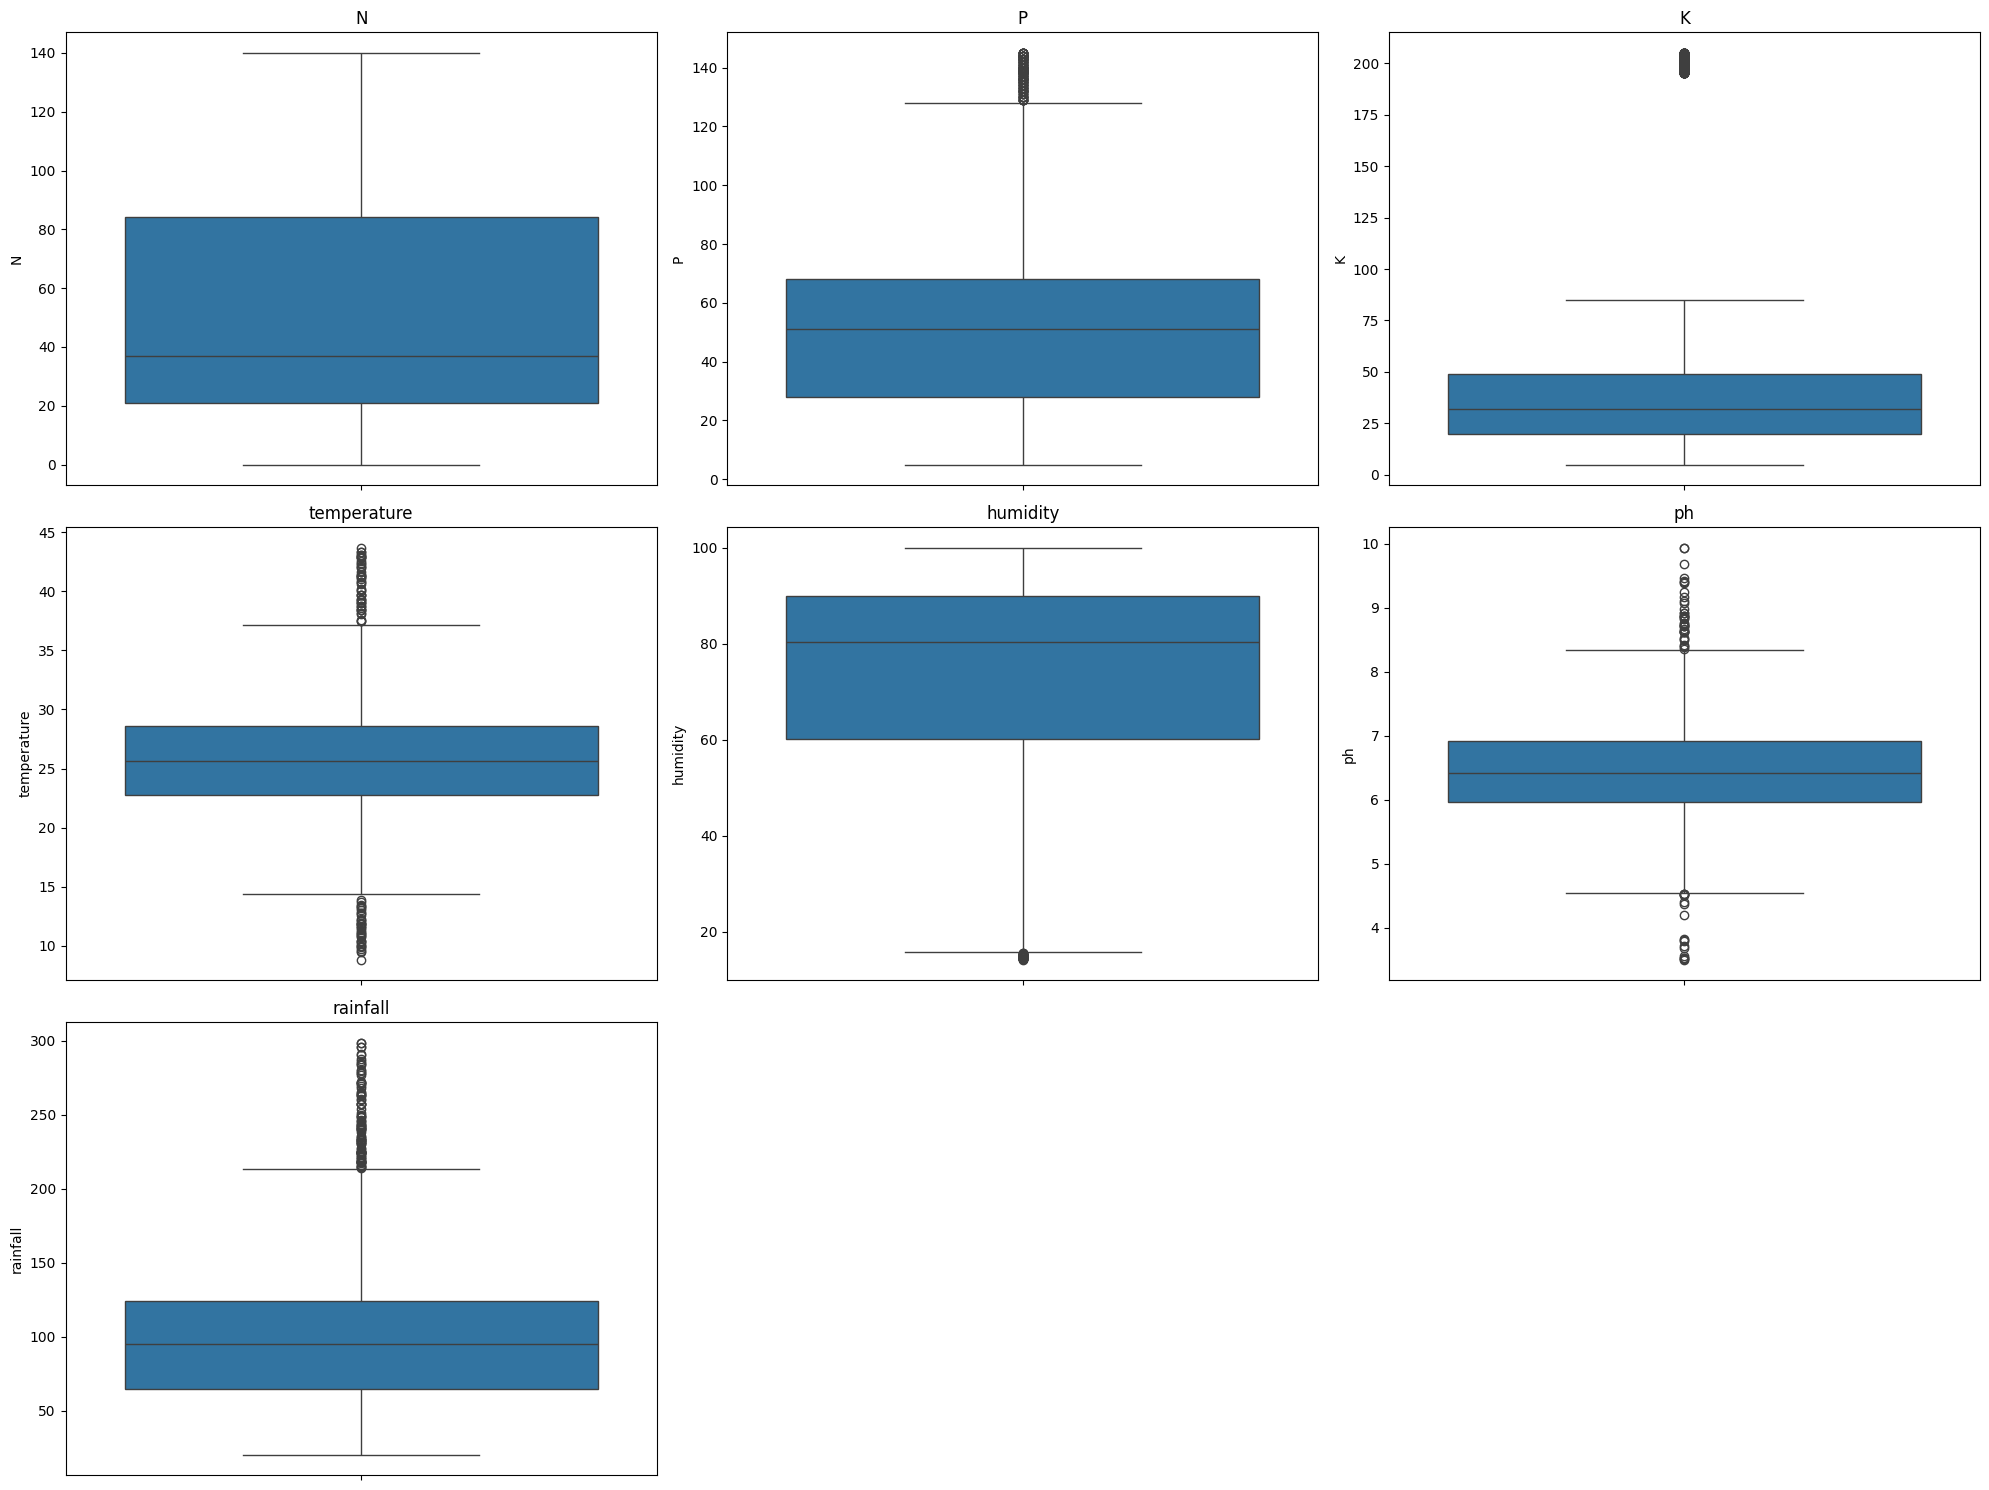

In [95]:
# Visualisation des boxplots pour détecter les outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The obtained boxplots show significant variability in the data, with different distributions depending on the variables studied. Some variables, such as humidity, exhibit a moderate dispersion around the median, while others, such as precipitation (rainfall) and soil nutrients (N, P, K), display greater variability, suggesting significant deviations between observed values. The presence of extreme values, particularly for precipitation and phosphorus (P), indicates that some observations deviate strongly from the majority of the data, which may reflect unusual phenomena or specific conditions affecting these variables. These results highlight heterogeneity in the data, likely reflecting natural variations in the studied factors.

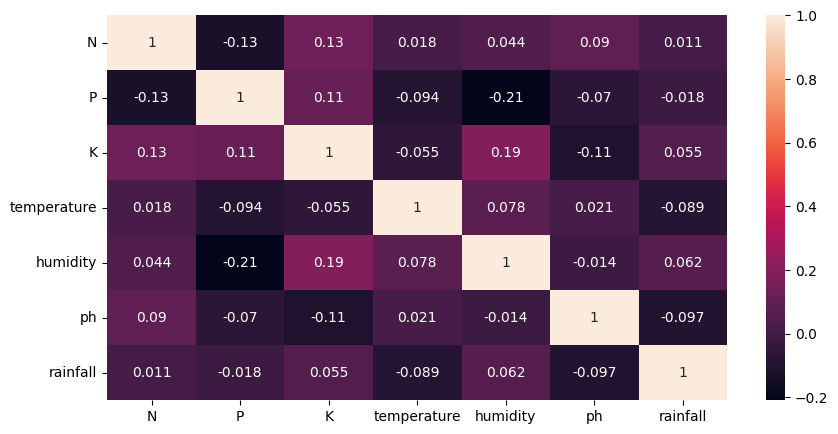

In [96]:
df_numeric = df.select_dtypes(include=['number'])  # Sélectionne uniquement les colonnes numériques
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df_numeric.corr(method='kendall'), annot=True)
plt.show()


The correlations are generally weak, indicating that no variable has a strong linear relationship with another. For example, P and humidity have a slight negative correlation (-0.21), while K and humidity show a weak positive correlation (0.19). This analysis helps identify potential relationships between variables, making it easier to select the most relevant features for a machine learning model or to better understand the factors influencing certain conditions in the dataset.

In [97]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [98]:
@interact

def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

This interface helps identify which crops require more or less of each factor, allowing for better plantation planning.


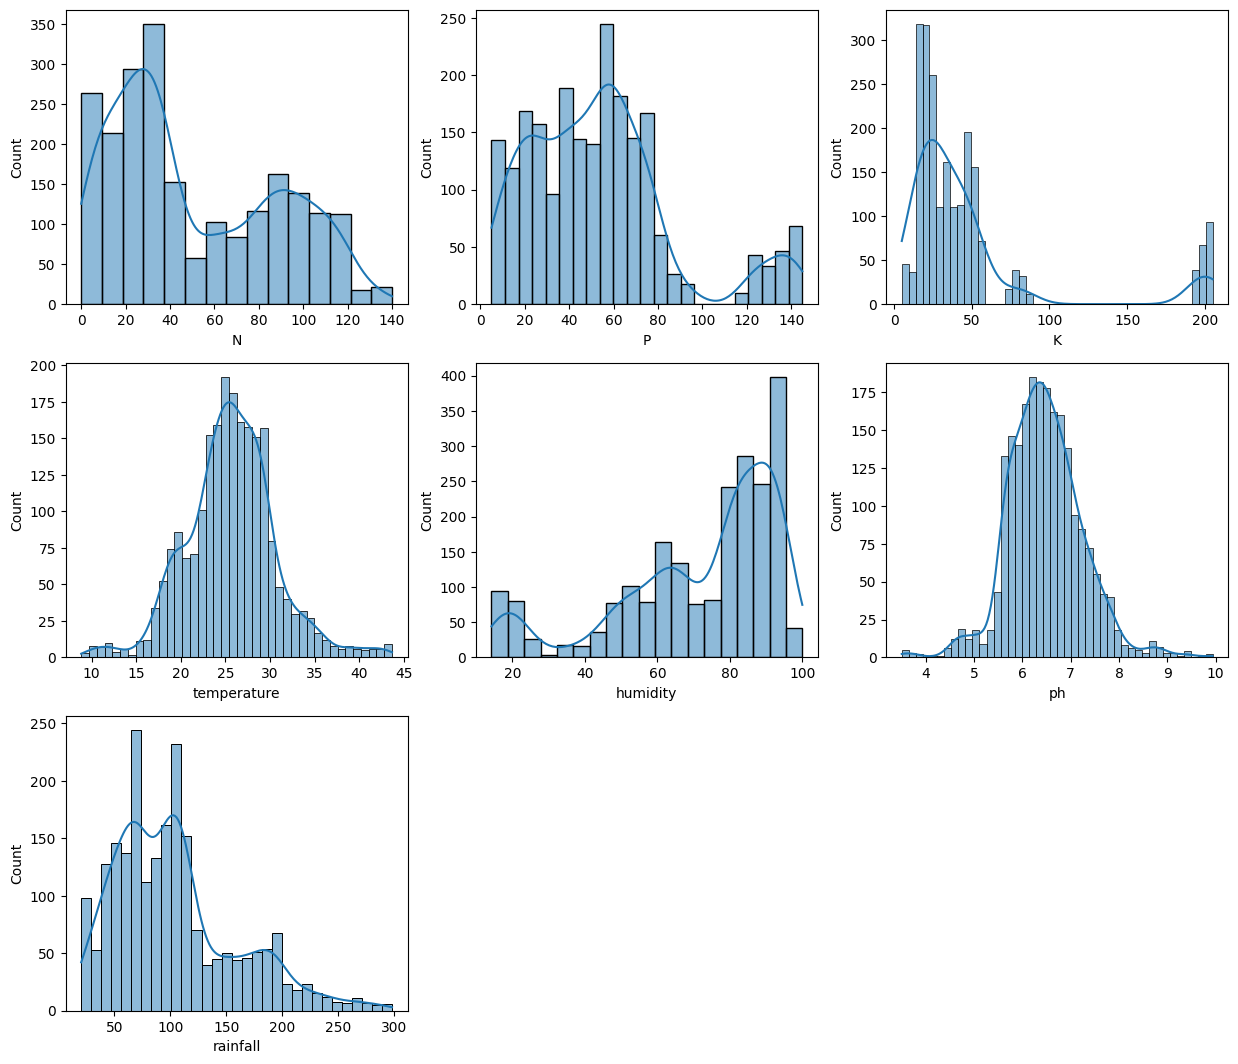

In [99]:
UnivariantAnalCol = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in UnivariantAnalCol:
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    i+=1
plt.show()

Analyze the distribution of numerical variables in the dataset (e.g., whether the distribution is normal, skewed, bimodal, etc.).

Detect potential anomalies or outliers in the data.

Understand the distribution of nutrients and climatic conditions for each crop.


Nitrogen (N): The distribution is multimodal with several peaks, indicating the presence of different categories of crops requiring varying amounts of nitrogen.

Phosphorus (P): The distribution is relatively uniform but shows a slight right skew, suggesting that some crops require higher amounts of phosphorus than the majority.

Potassium (K): The distribution is highly right-skewed, indicating that most crops require a low amount of potassium, while a few crops need very high levels.

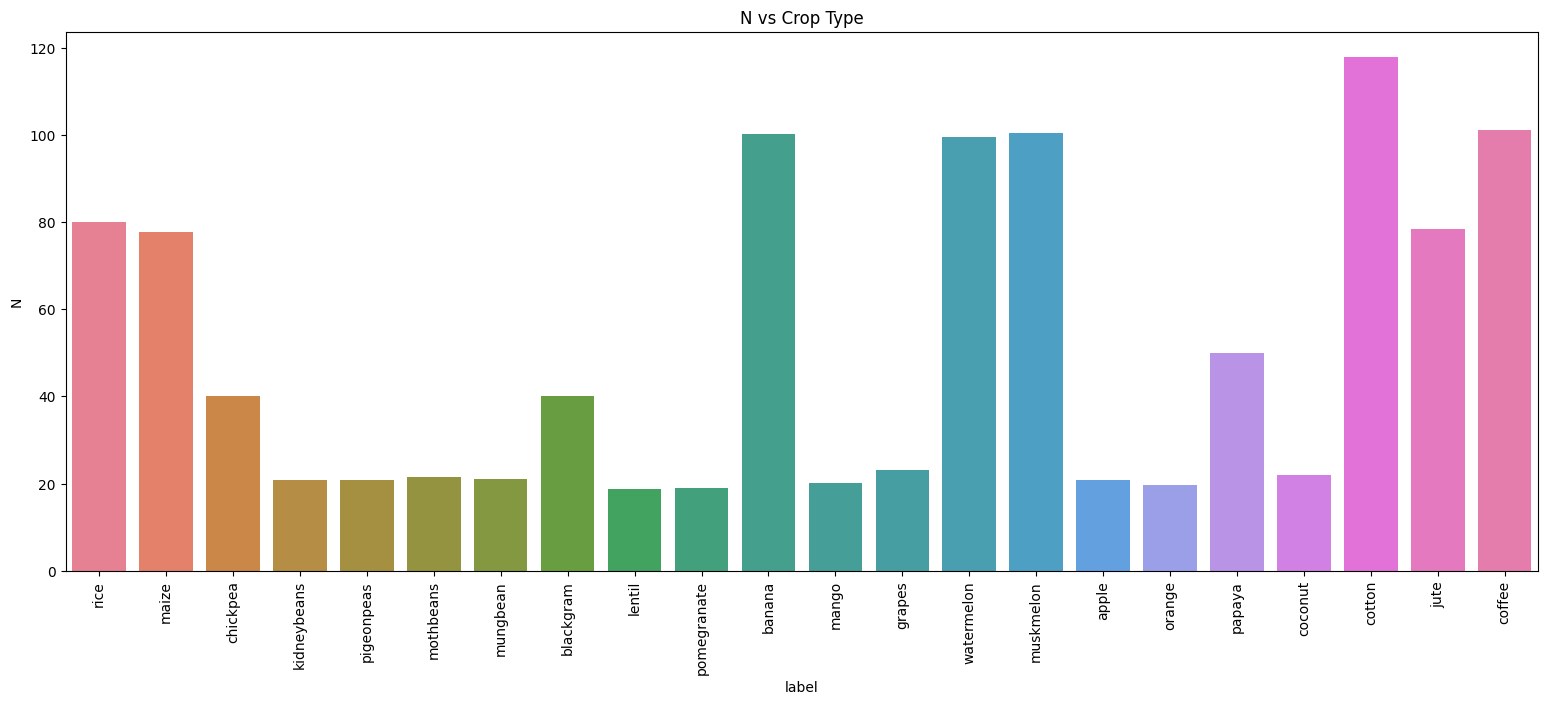

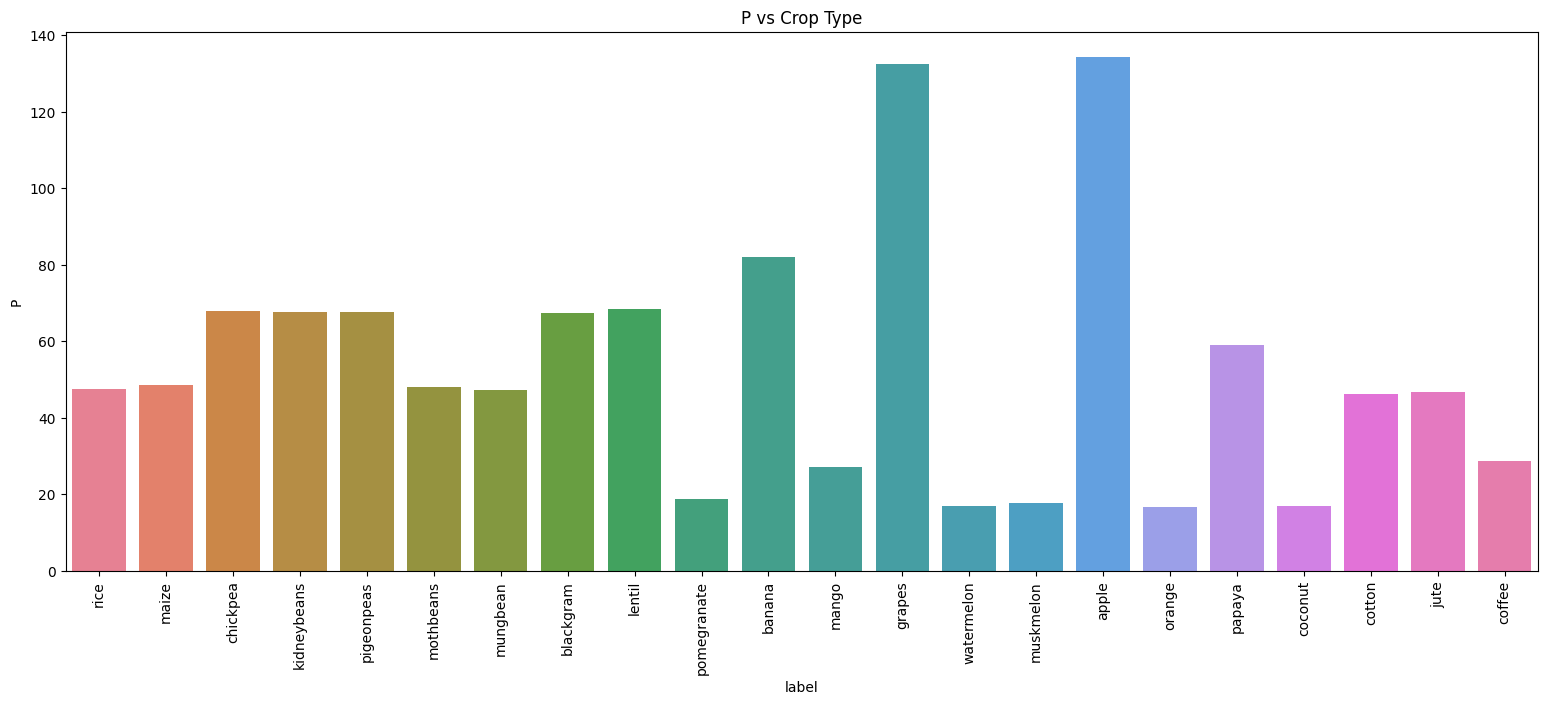

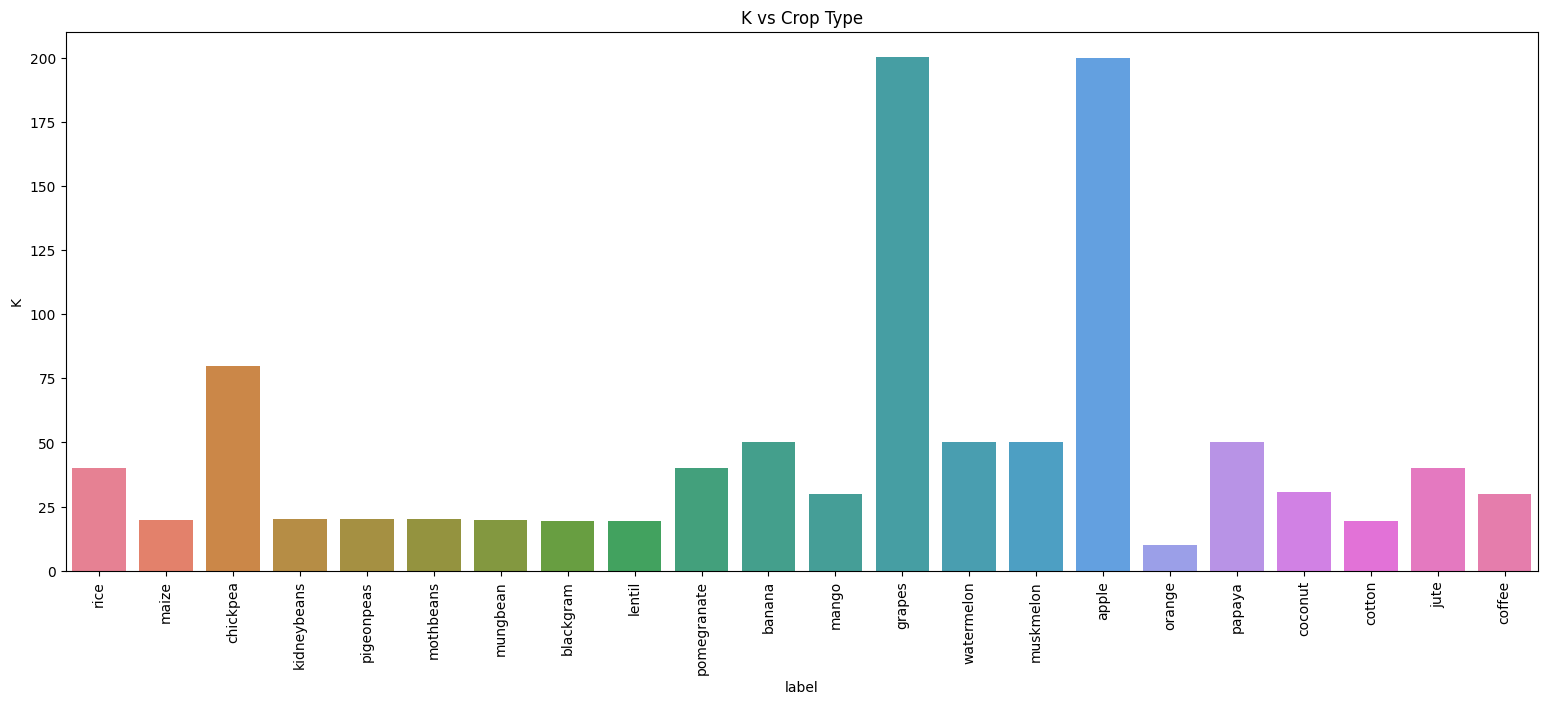

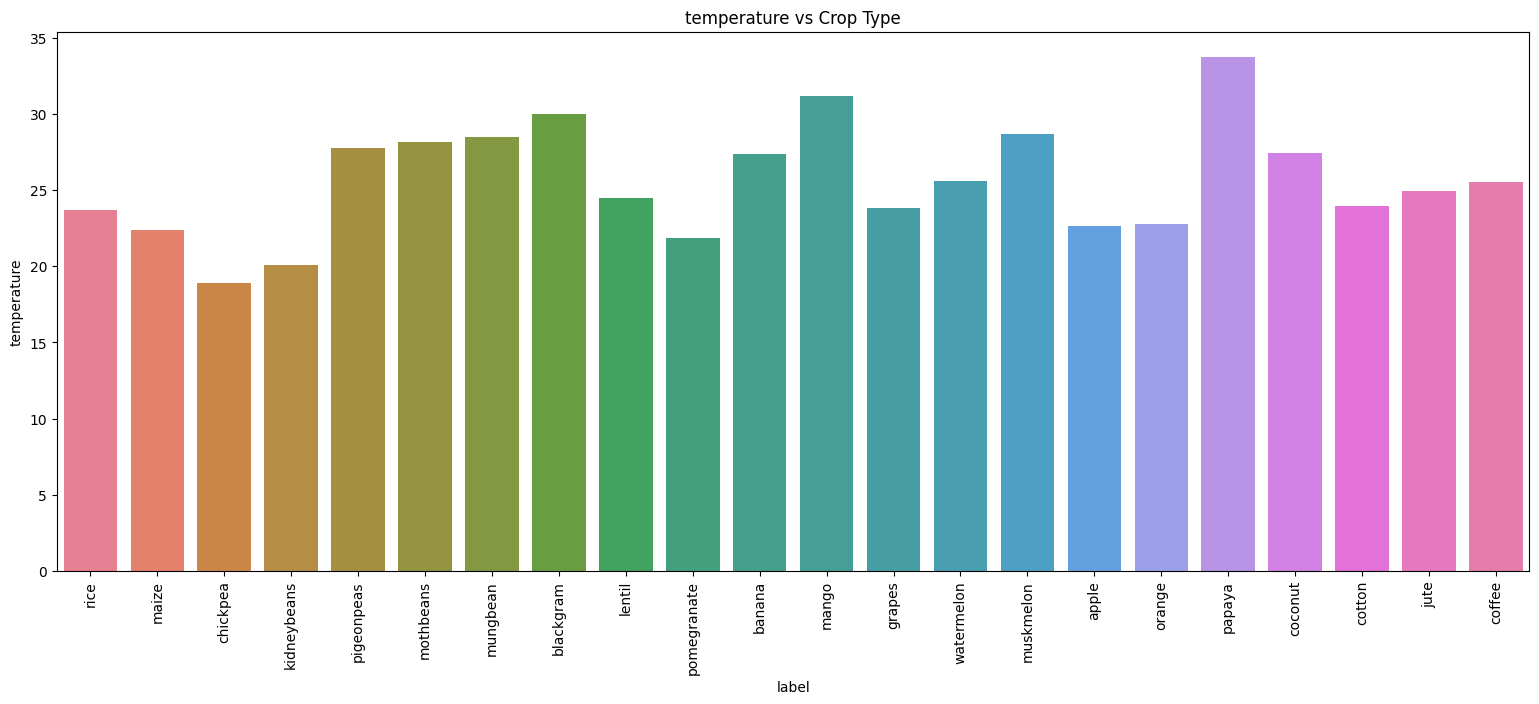

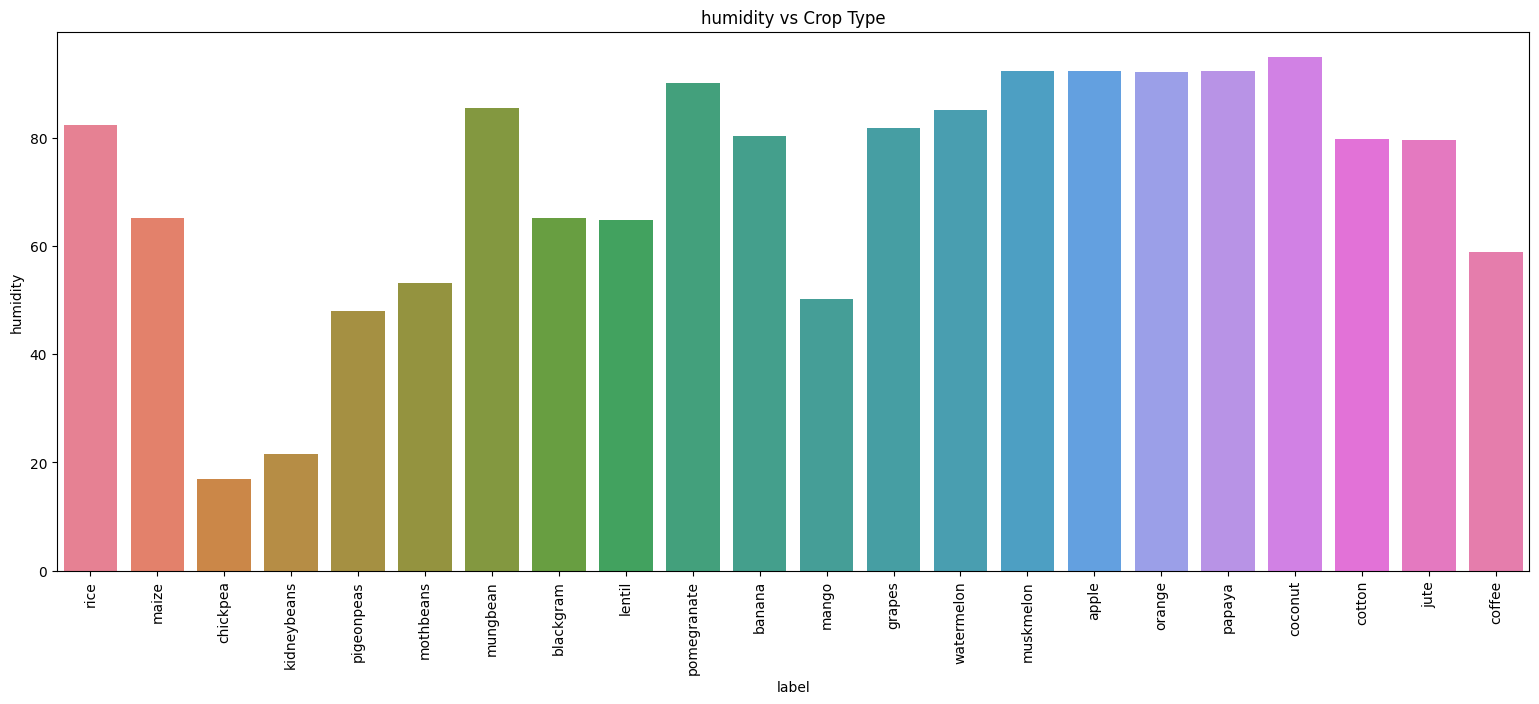

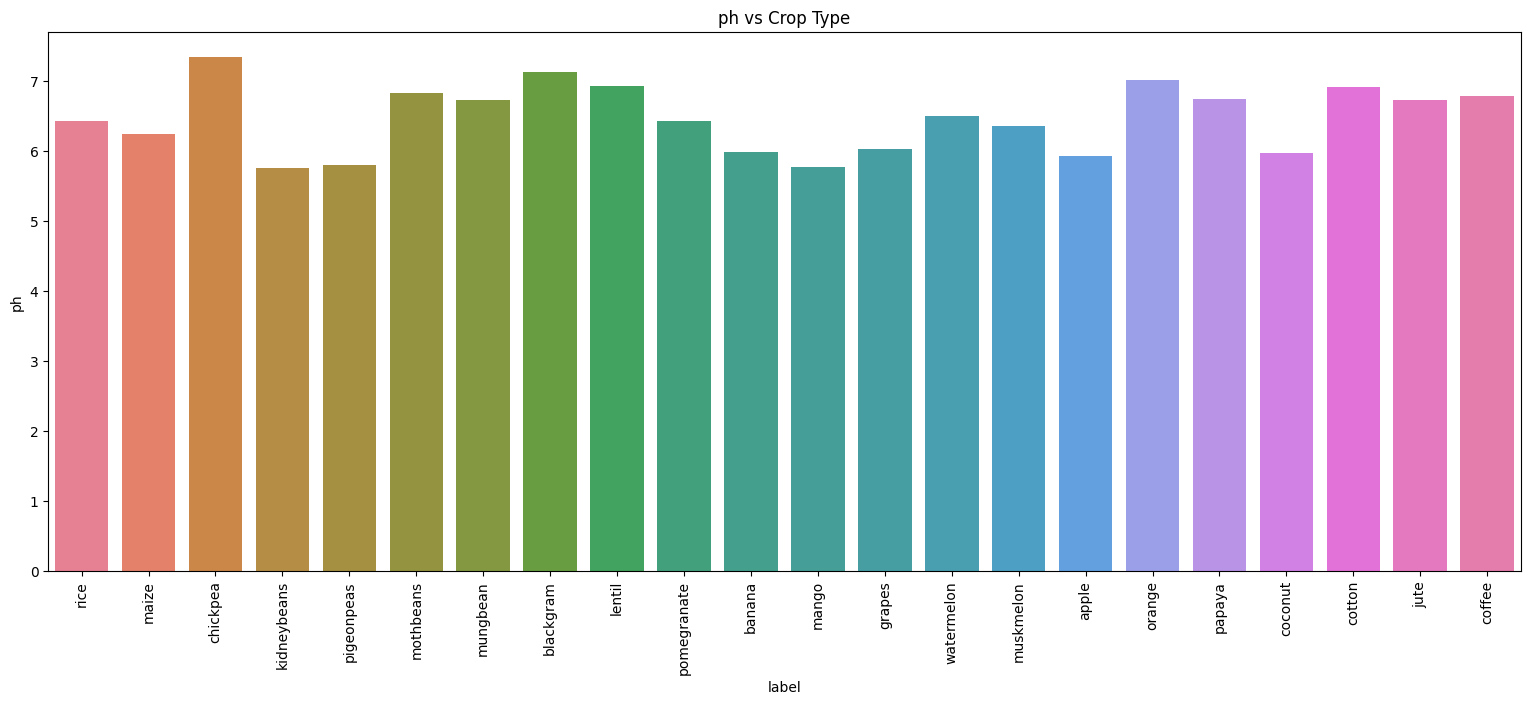

In [100]:
BivaraintAnalCol = df.columns[:-2]

for column in BivaraintAnalCol:
    plt.figure(figsize=(19,7))
    sns.barplot(x="label", y=column, data=df, palette="husl", errorbar=None)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()


This chart is useful for understanding the nitrogen or other factor requirements of different crops, enabling better fertilizer management and optimization of agricultural resources. It can help farmers adjust their nitrogen inputs to improve productivity while avoiding excess that could harm the environment.

In [101]:
df.head()
crops = df.groupby('label').mean()
crops

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


Compare crops: For example, coffee requires 101.20 in nitrogen, while rice only needs 79.89.
Optimize resource use: For example, coconut requires a significant amount of rainfall (175.69 mm) compared to watermelon (50.79 mm).

Adapt crops to local conditions: For example, if the soil is acidic (low pH), a suitable crop like chickpea (pH 7.33) can be chosen.


In summary, this table helps identify the specific needs of each crop and optimize the use of fertilizers, water, and growing conditions.

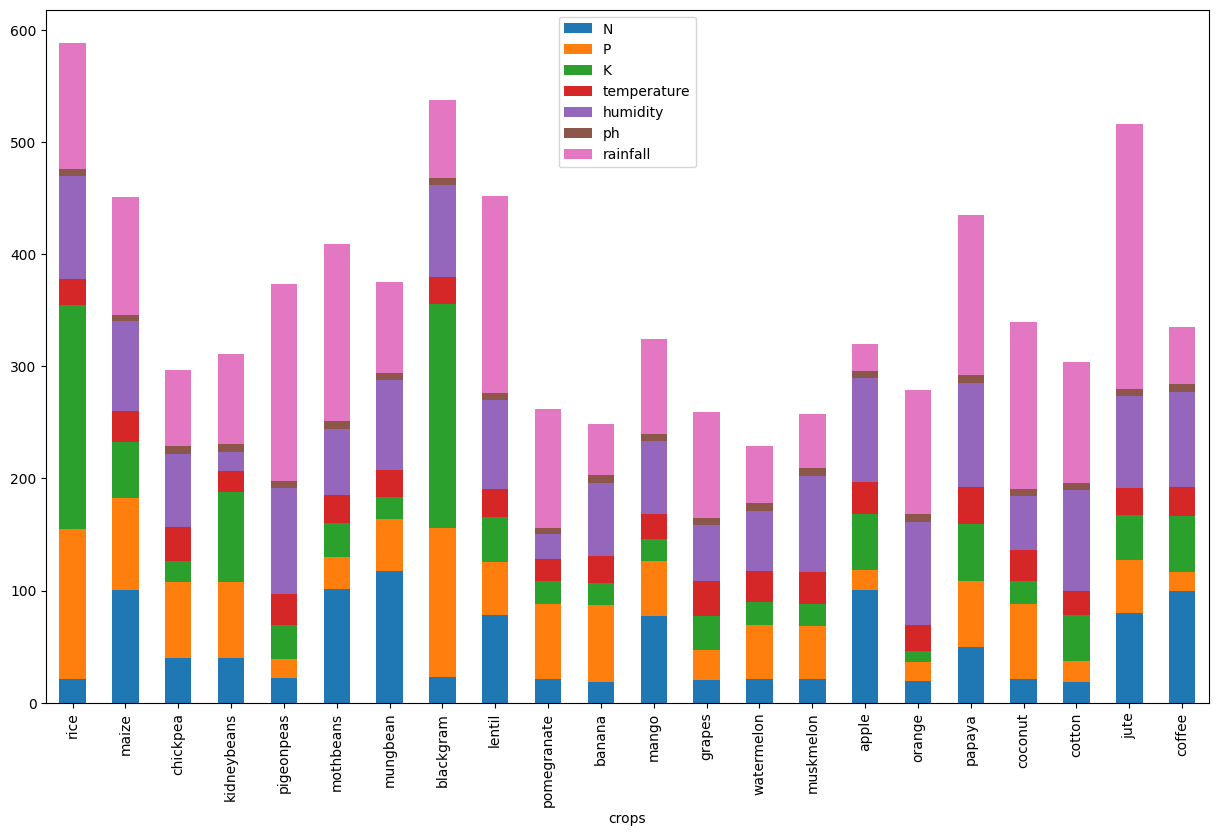

In [102]:
crops_list = df['label'].unique()
crops['crops'] = crops_list
crops.plot(x='crops', kind='bar', stacked=True,
        title='' , figsize=(15, 9));

Visualize the nutrient requirements and environmental conditions for each crop in the form of a stacked bar chart.


<font color='Green' size='5'><b>4. Feature Selection</b></font>

In [103]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

**Initialization of lists to store models and their**  **performance**

In [104]:
ML_models = []
Model_Accuracies = []

In [105]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)


<font color='Green' size='5'><b>5. Modeling Classification algorithms</b></font>

<font color='Brown' size='5'><b>I. Decision Tree Classifier</b></font>

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans   pigeonpeas
2010         jute         jute

[440 rows x 2 columns]
DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00     

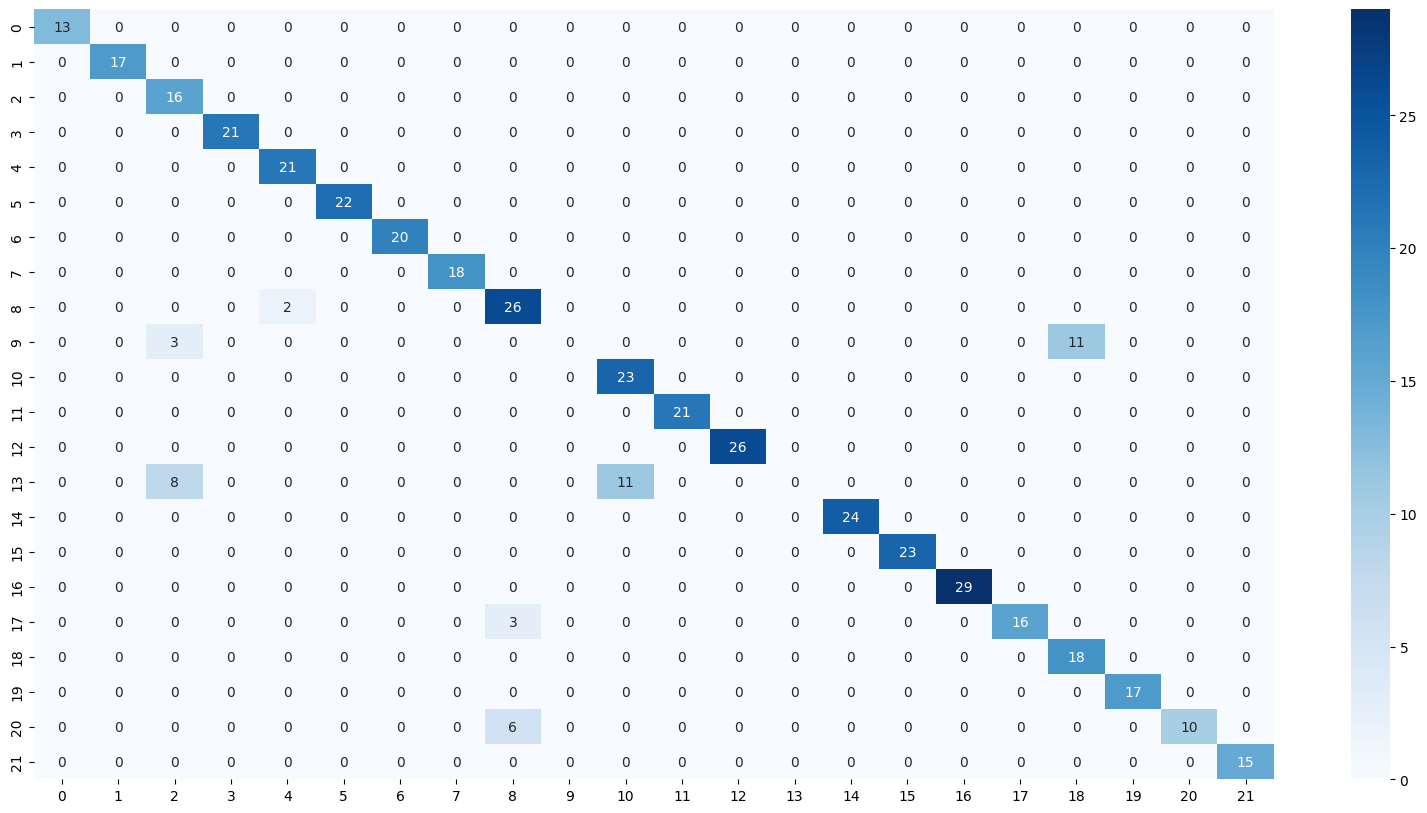

In [106]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Decision Tree')

# Comparing Actual vs Predicted
DT_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy
print(DT_OutputDF)
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [107]:
# Cross validation score for DecisionTree
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

Ce code sert à évaluer les performances de ton modèle DecisionTree en utilisant la validation croisée (cross-validation) avec 5 folds (cv=5).
Divise les données en 5 sous-ensembles (folds).
Entraîne le modèle DecisionTree sur 4 folds et le teste sur le 5.

In [108]:
import numpy as np

# Exemple de valeurs manuelles (remplace par tes propres valeurs)
input_data = np.array([[90, 42, 50, 26, 80, 6.5, 120]])  # (N, P, K, Température, Humidité, pH, Pluviométrie)

# Prédiction avec le modèle entraîné
predicted_crop = DecisionTree.predict(input_data)

# Affichage du résultat
print("La culture prédite est :", predicted_crop[0])


La culture prédite est : jute


In [109]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Création des widgets d'entrée
N = widgets.IntSlider(min=0, max=200, step=1, value=50, description="Azote (N)")
P = widgets.IntSlider(min=0, max=150, step=1, value=30, description="Phosphore (P)")
K = widgets.IntSlider(min=0, max=200, step=1, value=50, description="Potassium (K)")
Temp = widgets.FloatSlider(min=0, max=50, step=0.1, value=25, description="Température (°C)")
Humidity = widgets.FloatSlider(min=0, max=100, step=0.1, value=80, description="Humidité (%)")
pH = widgets.FloatSlider(min=0, max=14, step=0.1, value=6.5, description="pH")
Rainfall = widgets.FloatSlider(min=0, max=300, step=1, value=120, description="Pluviométrie (mm)")
button = widgets.Button(description="Prédire")

output = widgets.Output()

# Fonction pour faire la prédiction
def predict_crop(b):
    input_data = np.array([[N.value, P.value, K.value, Temp.value, Humidity.value, pH.value, Rainfall.value]])
    predicted_crop = DecisionTree.predict(input_data)

    output.clear_output()  # Efface la sortie précédente
    with output:
        print(f"🌱 Culture recommandée : {predicted_crop[0]}")  # Correctement indenté

button.on_click(predict_crop)

# Affichage de l'interface
display(N, P, K, Temp, Humidity, pH, Rainfall, button, output)



IntSlider(value=50, description='Azote (N)', max=200)

IntSlider(value=30, description='Phosphore (P)', max=150)

IntSlider(value=50, description='Potassium (K)', max=200)

FloatSlider(value=25.0, description='Température (°C)', max=50.0)

FloatSlider(value=80.0, description='Humidité (%)')

FloatSlider(value=6.5, description='pH', max=14.0)

FloatSlider(value=120.0, description='Pluviométrie (mm)', max=300.0, step=1.0)

Button(description='Prédire', style=ButtonStyle())

Output()

In [110]:
!pip install gradio


In [111]:

import gradio as gr
import numpy as np

# Fonction de prédiction
def predict_crop(N, P, K, Temp, Humidity, pH, Rainfall):
    input_data = np.array([[N, P, K, Temp, Humidity, pH, Rainfall]])
    predicted_crop = DecisionTree.predict(input_data)
    return f"🌱 Culture recommandée : {predicted_crop[0]}"

# Création de l'interface avec un design amélioré
with gr.Blocks() as app:
    gr.Markdown("### 🌾 Prédiction de Culture Agricole 🌿")  # ✅ Correction ici

    gr.Image("/content/CropRecommendation.jpg", width=350)

    with gr.Row():
        with gr.Column():
            N = gr.Slider(0, 200, label="Azote (N) 🧪")
            P = gr.Slider(0, 150, label="Phosphore (P) 🧪")
            K = gr.Slider(0, 200, label="Potassium (K) 🧪")

        with gr.Column():
            Temp = gr.Slider(0.0, 50.0, label="Température (°C) 🌡️")
            Humidity = gr.Slider(0.0, 100.0, label="Humidité (%) 💧")
            pH = gr.Slider(0.0, 14.0, label="pH 🔬")
            Rainfall = gr.Slider(0, 300, label="Pluviométrie (mm) ☔")

    btn = gr.Button("🌱 Prédire la Culture")
    output = gr.Textbox(label="🌾 Résultat")

    btn.click(predict_crop, inputs=[N, P, K, Temp, Humidity, pH, Rainfall], outputs=output)

# Lancer l'application
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ee3f368129bcedf2d8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


<font color='Brown' size='5'><b>II. Gaussian Naive Bayes
</b></font>

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans  kidneybeans
2010         jute         jute

[440 rows x 2 columns]
Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans      

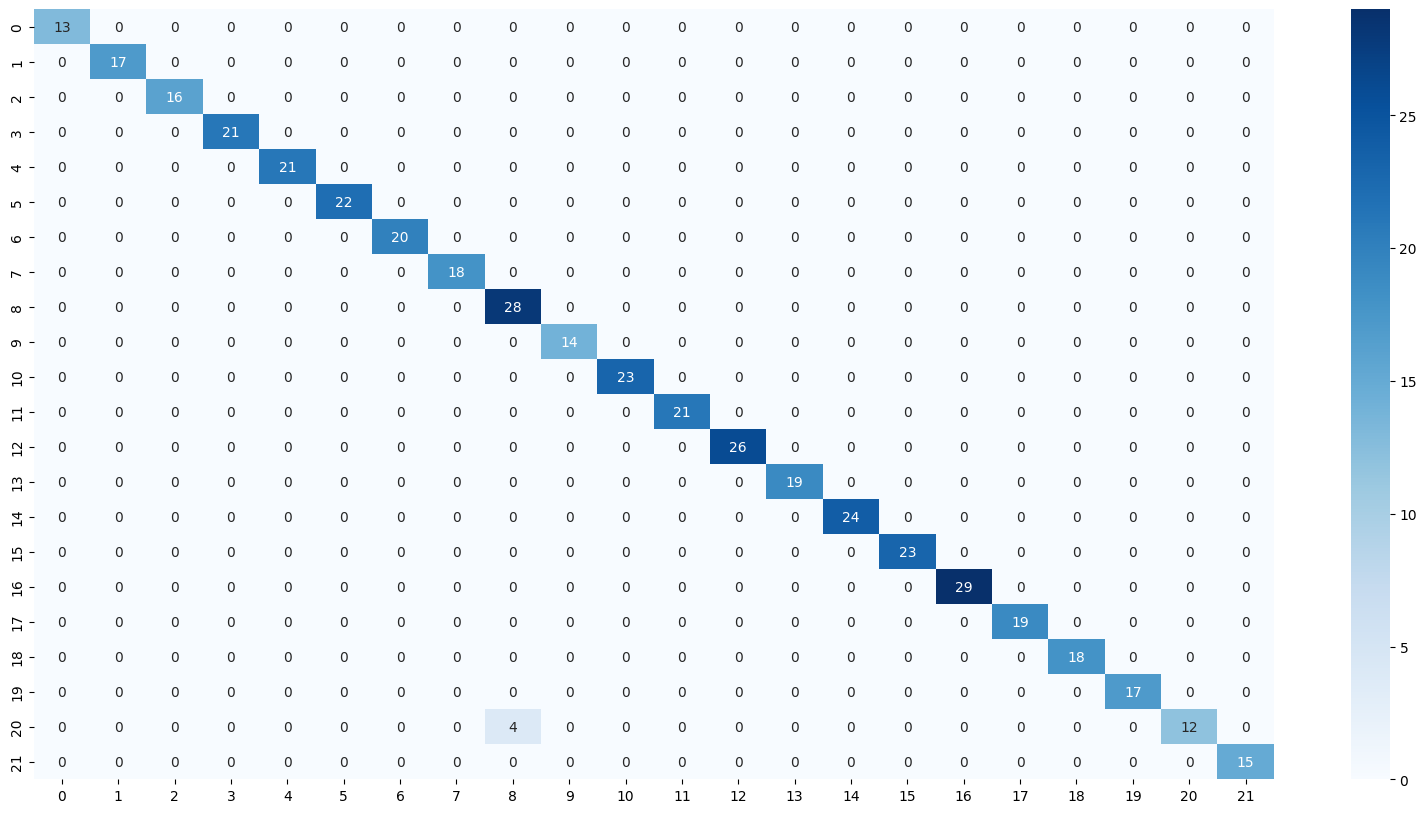

In [112]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Naive Bayes')

NB_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy
print(NB_OutputDF)
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [113]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

<font color='Blue' size='5'><b> Finding the Best Value for Hyperparameter (Hyperparameter Tuning)
</b></font>

Accuracy at N = 1 is 0.990909090909091
Accuracy at N = 2 is 0.990909090909091
Accuracy at N = 3 is 0.990909090909091
Accuracy at N = 4 is 0.990909090909091
Accuracy at N = 5 is 0.990909090909091
Accuracy at N = 6 is 0.990909090909091
Accuracy at N = 7 is 0.990909090909091
Accuracy at N = 8 is 0.990909090909091
Accuracy at N = 9 is 0.990909090909091
Accuracy at N = 10 is 0.990909090909091
Accuracy at N = 11 is 0.990909090909091
Accuracy at N = 12 is 0.990909090909091
Accuracy at N = 13 is 0.990909090909091
Accuracy at N = 14 is 0.990909090909091
Accuracy at N = 15 is 0.990909090909091
Accuracy at N = 16 is 0.990909090909091
Accuracy at N = 17 is 0.990909090909091
Accuracy at N = 18 is 0.990909090909091
Accuracy at N = 19 is 0.990909090909091
Accuracy at N = 20 is 0.990909090909091
Accuracy at N = 21 is 0.990909090909091
Accuracy at N = 22 is 0.990909090909091
Accuracy at N = 23 is 0.990909090909091
Accuracy at N = 24 is 0.990909090909091
Accuracy at N = 25 is 0.990909090909091
Accuracy 

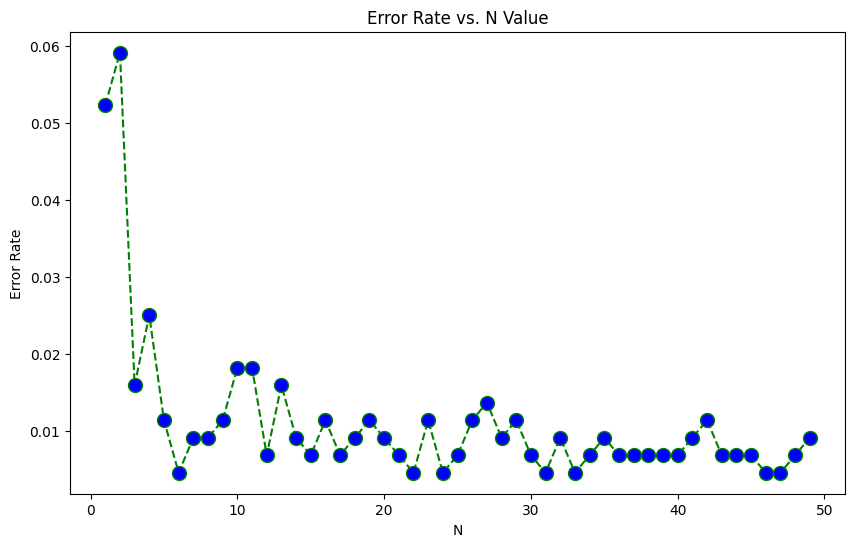

In [114]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = i))
    pipeline.fit(Xtrain, Ytrain)
    predictions = pipeline.predict(Xtest)
    accuracy = accuracy_score(Ytest, predicted_values)
    print(f"Accuracy at N = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != Ytest))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='green', linestyle='dashed',
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at N =",error_rate.index(min(error_rate))+1)

 <font color='Brown' size='5'><b>III.Random Forest</b></font>

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans  kidneybeans
2010         jute         jute

[440 rows x 2 columns]
RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00   

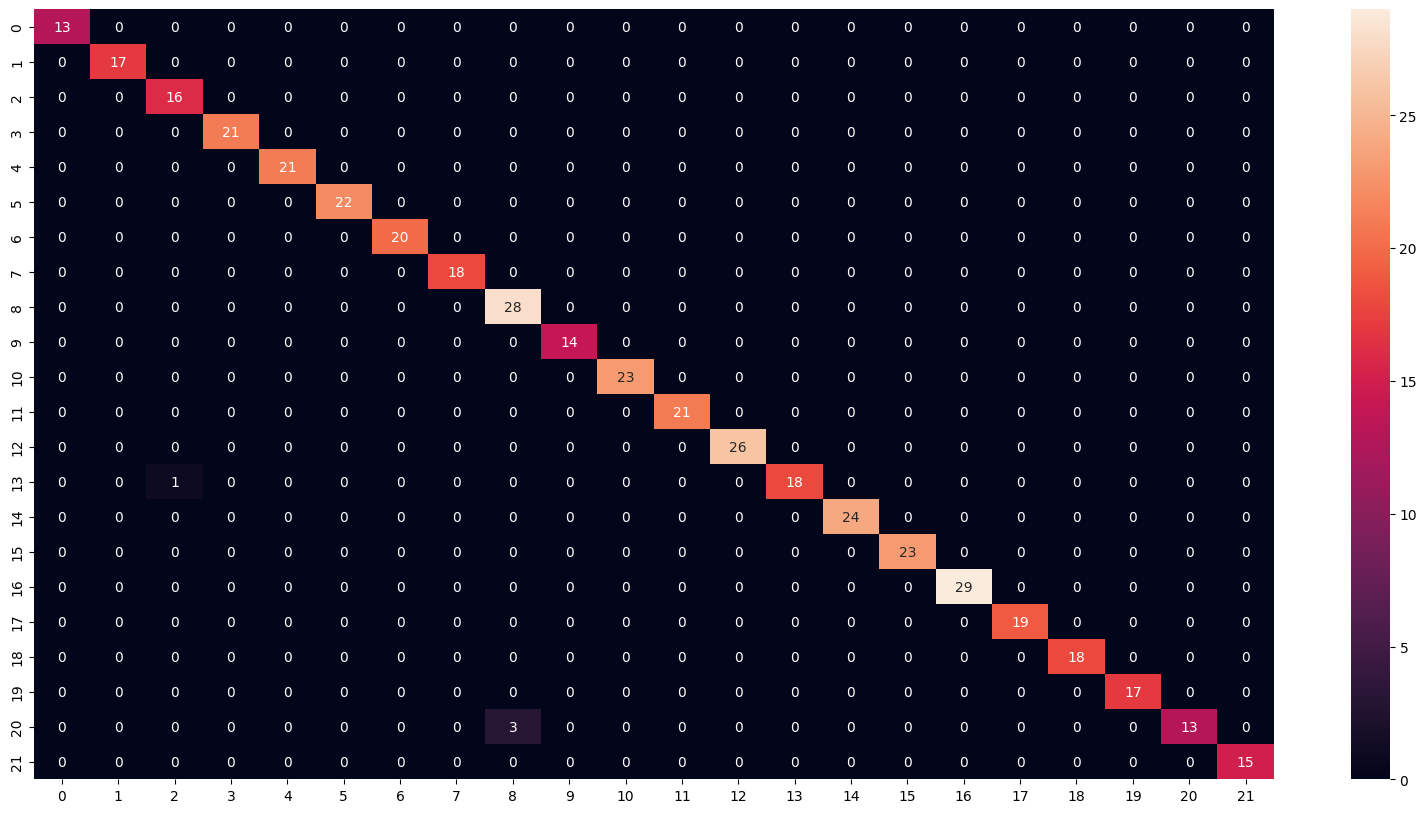

In [115]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('RF')
RF_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy
print(RF_OutputDF)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True)
plt.show()

In [116]:
# Cross validation score Random Forest
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

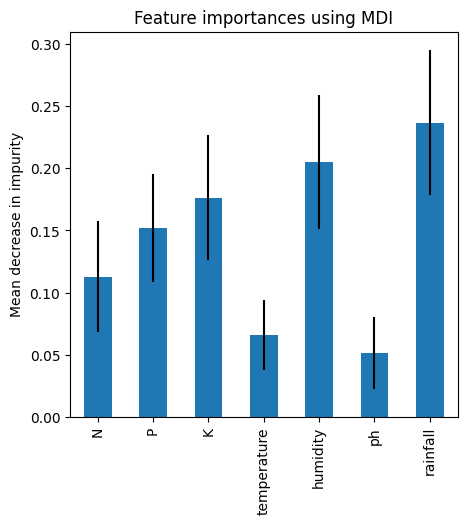

In [117]:
importances = RF.feature_importances_
labels = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
forest_importances = pd.Series(importances, index=labels)
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

Potassium, Humidity, and Rainfall are found to be the most important features effecting the plant growth.

In [118]:
print(set(Ytrain))  # Affiche les classes réelles


{'muskmelon', 'mothbeans', 'apple', 'mungbean', 'rice', 'grapes', 'watermelon', 'kidneybeans', 'maize', 'coconut', 'pomegranate', 'blackgram', 'coffee', 'orange', 'cotton', 'chickpea', 'papaya', 'pigeonpeas', 'mango', 'jute', 'lentil', 'banana'}


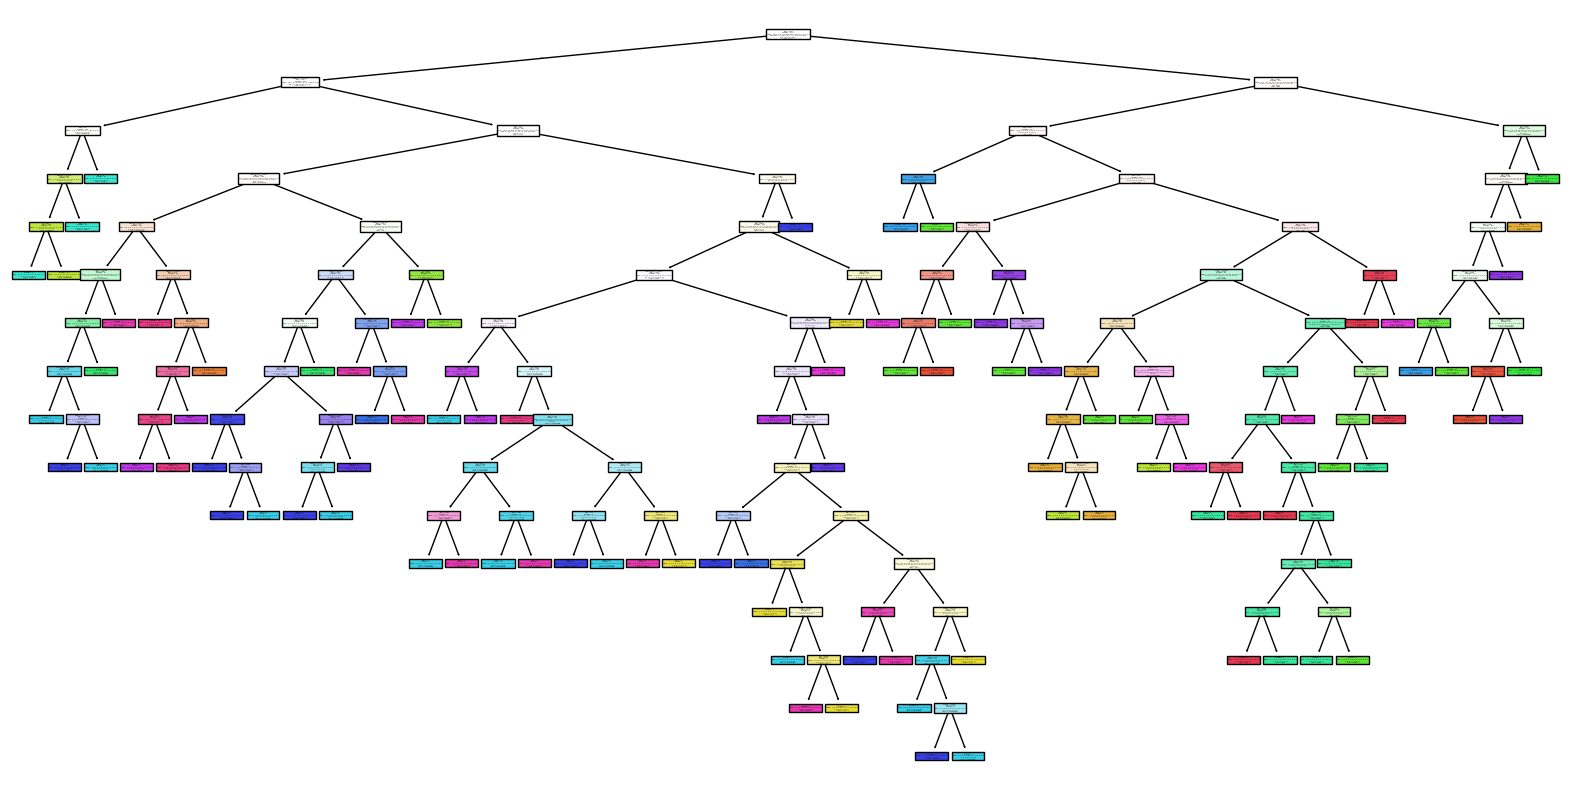

In [119]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Vérifier si la forêt contient des arbres
if len(RF.estimators_) > 0:
    tree_index = 0  # Sélectionner le premier arbre
    plt.figure(figsize=(20, 10))

    # Vérifier les vraies classes dans Ytrain
    class_labels = [str(cls) for cls in set(Ytrain)]

    # Vérifier la cohérence des features
    feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    if len(feature_names) != Xtrain.shape[1]:  # Vérifie si la taille correspond
        feature_names = [f'Feature {i}' for i in range(Xtrain.shape[1])]  # Génère des noms génériques

    plot_tree(RF.estimators_[tree_index], filled=True, feature_names=feature_names, class_names=class_labels)
    plt.show()


else:
    print("Le modèle Random Forest n'a pas d'arbres entraînés.")

 <font color='Brown' size='5'><b>IV. XGBoost Classifier
 </b></font>

In [120]:
ord_enc = OrdinalEncoder()
df["encodedLabel"] = ord_enc.fit_transform(df[["label"]])
df

,N,P,K,temperature,humidity,ph,rainfall,label,encodedLabel
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20.0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5.0



 <font color='Brown' size='5'><b>Feature Selection for XGBOOST</b></font>

In [121]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['encodedLabel']
labels = df['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

      Actual  Predicted
2121     5.0          5
960     19.0         19
952     19.0         19
1958     6.0          6
681     14.0         14
...      ...        ...
1684    16.0         16
1477    15.0         15
851     10.0         10
370      9.0          9
2010     8.0          8

[440 rows x 2 columns]
XGBoost's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        21
         4.0       1.00      1.00      1.00        21
         5.0       0.96      1.00      0.98        22
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        18
         8.0       0.93      0.96      0.95        28
         9.0       1.00      1.00      1.00        14
        10.0       0.96      1.00      0.98        2

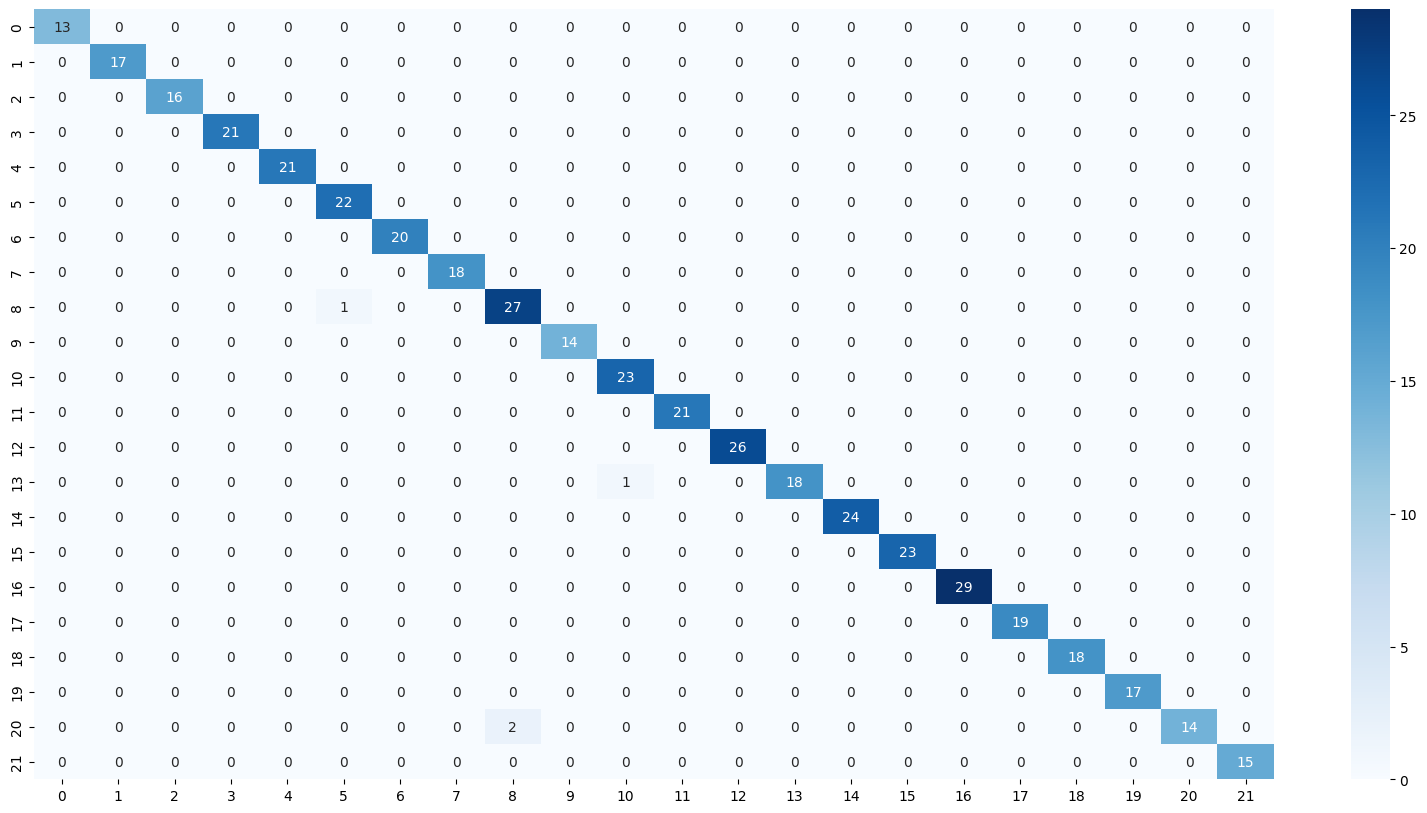

In [122]:
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('XGBoost')
XGB_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy
print(XGB_OutputDF)
print("XGBoost's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [123]:
# Cross validation score XGBoost
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

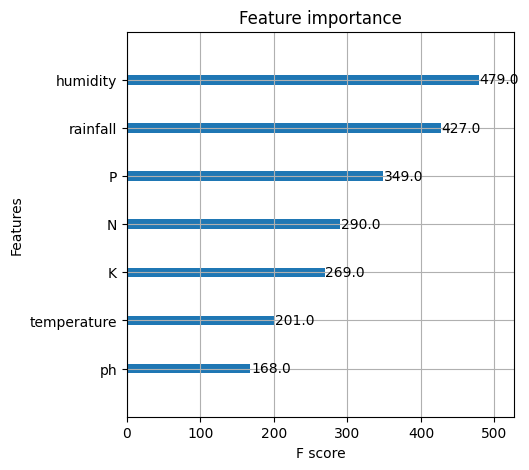

In [124]:
xgb.plot_importance(XB)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Potassium, Humidity, and Rainfall are found to be the most important features effecting the plant growth

 <font color='Brown' size='5'><b>V. Support Vector Machine (SVM)
 </b></font>

      Actual  Predicted
2121     5.0        5.0
960     19.0       19.0
952     19.0       19.0
1958     6.0        6.0
681     14.0       14.0
...      ...        ...
1684    16.0       16.0
1477    15.0       15.0
851     10.0       10.0
370      9.0        9.0
2010     8.0        8.0

[440 rows x 2 columns]
SVM Model's Accuracy is:  97.72727272727273
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        21
         4.0       1.00      1.00      1.00        21
         5.0       1.00      1.00      1.00        22
         6.0       0.95      1.00      0.98        20
         7.0       1.00      1.00      1.00        18
         8.0       0.86      0.86      0.86        28
         9.0       1.00      1.00      1.00        14
        10.0       0.96      1.00      0.98      

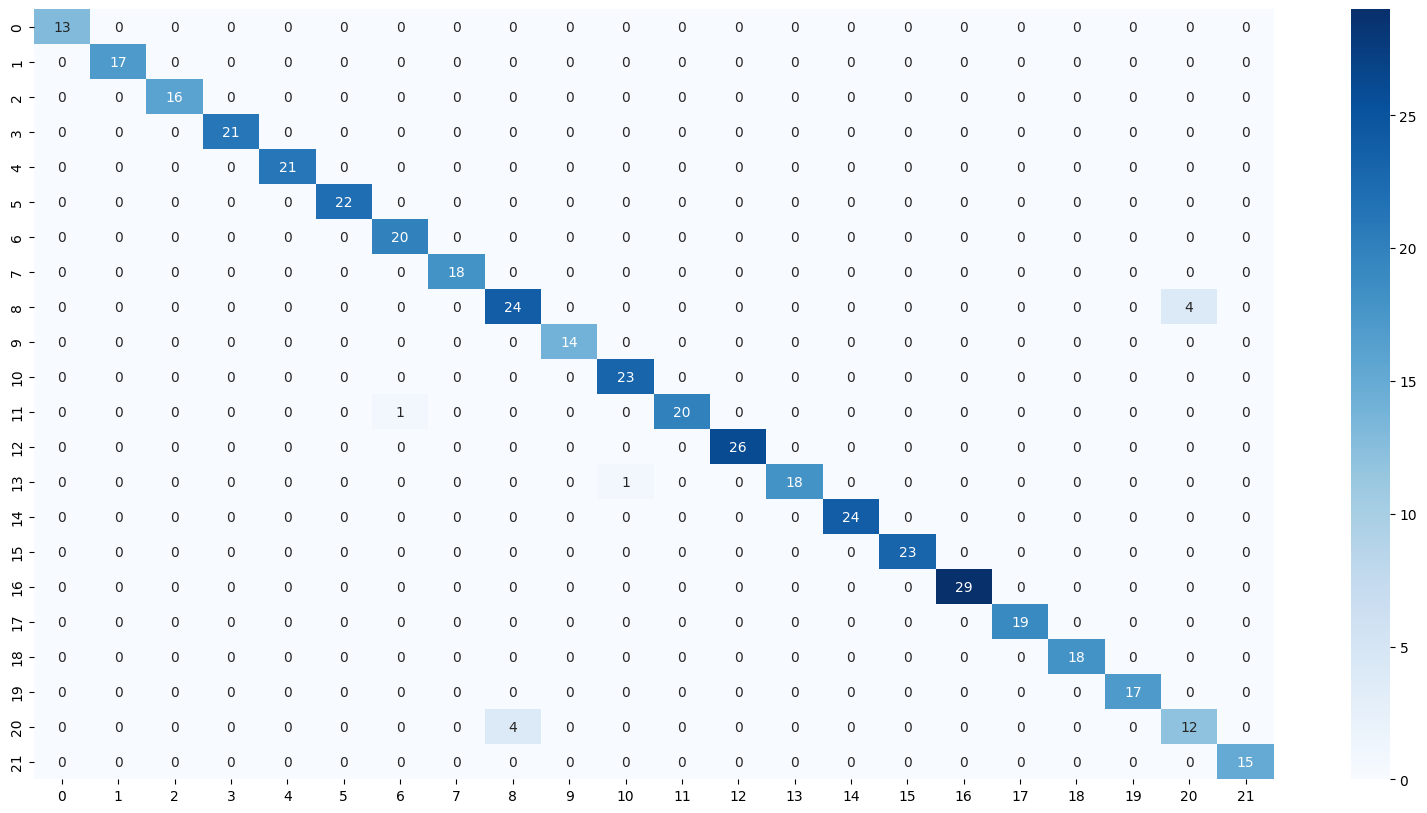

In [125]:
from sklearn.svm import SVC

SVM_Model = SVC(kernel='linear', C=1.0, random_state=42)

# Entraînement du modèle
SVM_Model.fit(Xtrain, Ytrain)

# Prédiction
predicted_values = SVM_Model.predict(Xtest)

# Évaluation
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x * 100)
ML_models.append('SVM')

# Affichage des résultats
SVM_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values})
print(SVM_OutputDF)
print("SVM Model's Accuracy is: ", x * 100)

# Rapport de classification
print(classification_report(Ytest, predicted_values))

# Matrice de confusion
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest, predicted_values), annot=True, cmap="Blues")
plt.show()

In [126]:
scores = cross_val_score(SVM_Model, features, target, cv=5)

# Affichage des scores obtenus pour chaque fold
print("Scores de validation croisée pour chaque fold :", scores)

Scores de validation croisée pour chaque fold : [0.98181818 0.98863636 0.98863636 0.98181818 0.98409091]


These results suggest that your SVM model is performing well and generalizing effectively on unseen data, with high average accuracy and stability across different data partitions.

In [129]:
pip install plotly nbformat

In [132]:
pio.templates.default = "plotly_dark"

# Correction : Créer la figure vide d'abord
fig = go.Figure()

# Puis ajouter le tracé Bar
fig.add_trace(go.Bar(
    x=Model_Accuracies,
    y=ML_models,
    orientation='h'
))

fig.update_layout(
    title="Accuracy Comparison",
    xaxis_title="Accuracy",
    yaxis_title="Algorithms"
)

fig.show()


In [131]:
import plotly.graph_objects as go
import numpy as np

# Exemple de données pour d'autres métriques (vous pouvez les remplacer par vos propres valeurs)
Model_Recalls = np.array(Model_Accuracies) - 5  # Exemple: Recall un peu plus bas
Model_F1_Scores = np.array(Model_Accuracies) - 3  # Exemple: F1-score légèrement ajusté

# Création de la figure avec barres groupées
fig = go.Figure()

# Ajouter les précisions (Accuracy)
fig.add_trace(go.Bar(
    x=Model_Accuracies,
    y=ML_models,
    orientation='h',
    name="Accuracy",
    marker_color='blue'
))

# Ajouter les Recalls
fig.add_trace(go.Bar(
    x=Model_Recalls,
    y=ML_models,
    orientation='h',
    name="Recall",
    marker_color='orange'
))

# Ajouter les F1-Scores
fig.add_trace(go.Bar(
    x=Model_F1_Scores,
    y=ML_models,
    orientation='h',
    name="F1-Score",
    marker_color='green'
))

# Mise en forme du graphique
fig.update_layout(
    title="Comparison of Machine Learning Models",
    barmode='group',  # Permet d'afficher les barres côte à côte
    xaxis_title="Score",
    yaxis_title="Algorithms",
    template="plotly_dark"
)

# Affichage
fig.show()

